In [1]:
# Import packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from cnn_utils import *
import time

In [2]:
X_train, Y_train, X_test, Y_test = load_data()

In [20]:
X_new = load_predict_data()

Text(0.5,1,'112-th sample')

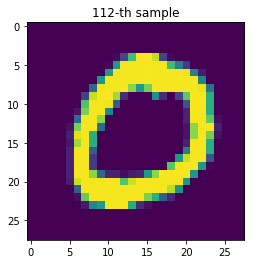

In [147]:
i += 1
plt.imshow(X_new[i][:,:,0])
plt.title(str(i+1) + "-th sample")

In [512]:
i = 2150

Text(0.5,1,'Pic 2534')

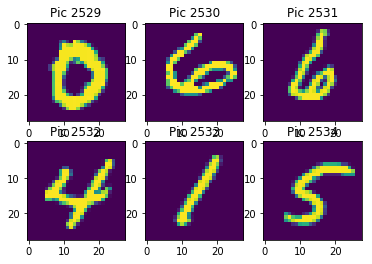

In [575]:
i += 6
fig = plt.figure()
a = fig.add_subplot(2, 3, 1); plt.imshow(X_new[i][:,:,0])
a.set_title("Pic " + str(i+1))
a = fig.add_subplot(2, 3, 2); plt.imshow(X_new[i+1][:,:,0])
a.set_title("Pic " + str(i+2))
a = fig.add_subplot(2, 3, 3); plt.imshow(X_new[i+2][:,:,0])
a.set_title("Pic " + str(i+3))
a = fig.add_subplot(2, 3, 4); plt.imshow(X_new[i+3][:,:,0])
a.set_title("Pic " + str(i+4))
a = fig.add_subplot(2, 3, 5); plt.imshow(X_new[i+4][:,:,0])
a.set_title("Pic " + str(i+5))
a = fig.add_subplot(2, 3, 6); plt.imshow(X_new[i+5][:,:,0])
a.set_title("Pic " + str(i+6))

In [3]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          max_num_epochs = 100, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    """

    tf.set_random_seed(1)
    seed = 3 
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = [] 

    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    W1, W2, W3 = initialize_parameters()
    
    Z = forward_propagation(X, W1, W2, W3)
    cost = compute_cost(Z, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
    mincost = float('inf')
    ep = 0
    
    with tf.Session() as sess:
    
        sess.run(init)
        for epoch in range(max_num_epochs):
            
            ep += 1
            
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches     
                
            if print_cost and epoch % 5 == 0: print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost and epoch % 5 == 0: costs.append(minibatch_cost)
                    
            if minibatch_cost < mincost:
                ep = 0
                mincost = minibatch_cost
                save_path = saver.save(sess, CKPT_PATH)
                print("Model saved in file: %s" % save_path)
            
            if ep > 10:
                break
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        predict_op = tf.argmax(Z, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})

        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        

Cost after epoch 0: 0.197427
Model saved in file: ./cnn/cnn.ckpt
Model saved in file: ./cnn/cnn.ckpt
Model saved in file: ./cnn/cnn.ckpt
Model saved in file: ./cnn/cnn.ckpt
Model saved in file: ./cnn/cnn.ckpt
Cost after epoch 5: 0.041063
Model saved in file: ./cnn/cnn.ckpt
Model saved in file: ./cnn/cnn.ckpt
Cost after epoch 10: 0.043676
Model saved in file: ./cnn/cnn.ckpt
Model saved in file: ./cnn/cnn.ckpt
Cost after epoch 15: 0.046827
Cost after epoch 20: 0.040619
Cost after epoch 25: 0.039415


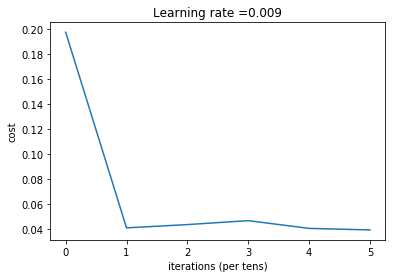

In [ ]:
start = time.time()
model(X_train, Y_train, X_test, Y_test, max_num_epochs = 30, minibatch_size = 64)
print("Run time: %s s" % (time.time() - start))